<a href="https://colab.research.google.com/github/KodumuruRaja/Feature-Selection/blob/main/Feature-Selection-(F-Score%20and%20Chi2%20(%CF%872)%20Test).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score

In [ ]:
titanic=sns.load_dataset('titanic')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic.drop(labels=['age','deck'],axis=1,inplace=True)

In [ ]:
titanic=titanic.dropna()

In [ ]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
data=titanic[['pclass','sex','sibsp','parch','embarked','who','alone']].copy()

In [ ]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,male,1,0,S,man,False
1,1,female,1,0,C,woman,False
2,3,female,0,0,S,woman,True
3,1,female,1,0,S,woman,False
4,3,male,0,0,S,man,True


In [ ]:
data.isnull().sum()

pclass      0
sex         0
sibsp       0
parch       0
embarked    0
who         0
alone       0
dtype: int64

In [ ]:
sex={'male':0,'female':1}
data['sex']=data['sex'].map(sex)

In [ ]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,S,man,False
1,1,1,1,0,C,woman,False
2,3,1,0,0,S,woman,True
3,1,1,1,0,S,woman,False
4,3,0,0,0,S,man,True


In [ ]:
ports={'S':0,'C':1,'Q':2}
data['embarked']=data['embarked'].map(ports)

In [ ]:
who={'man':0,'woman':1,'child':2}
data['who']=data['who'].map(who)

In [ ]:
alone={True:1,False:0}
data['alone']=data['alone'].map(alone)

In [ ]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,0
1,1,1,1,0,1,1,0
2,3,1,0,0,0,1,1
3,1,1,1,0,0,1,0
4,3,0,0,0,0,0,1


# **Do F-Score**

In [ ]:
x=data.copy()
y=titanic['survived']

In [ ]:
x.shape,y.shape

((889, 7), (889,))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
fs=chi2(x_train,y_train)

In [ ]:
fs

(array([ 22.65169202, 152.91534343,   0.52934285,  10.35663782,
         16.13255653, 161.42431175,  13.4382363 ]),
 array([1.94189138e-06, 3.99737147e-35, 4.66883271e-01, 1.29009955e-03,
        5.90599986e-05, 5.52664700e-37, 2.46547298e-04]))

In [ ]:
pv=pd.Series(fs[1],index=x_train.columns)
pv.sort_values(ascending=True,inplace=True)

In [ ]:
pv

who         5.526647e-37
sex         3.997371e-35
pclass      1.941891e-06
embarked    5.906000e-05
alone       2.465473e-04
parch       1.290100e-03
sibsp       4.668833e-01
dtype: float64

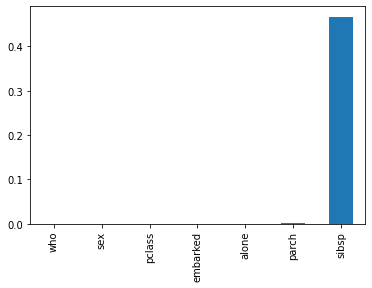

In [ ]:
pv.plot.bar()

In [ ]:
x_train_2=x_train[['who','sex']]
x_test_2=x_test[['who','sex']]

In [ ]:
def run(x_train,x_test,y_train,y_test):
  clf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  print("Accuracy:",accuracy_score(y_test,y_pred))

In [ ]:
%%time
run(x_train_2,x_test_2,y_train,y_test)

Accuracy: 0.7191011235955056
CPU times: user 237 ms, sys: 38.4 ms, total: 276 ms
Wall time: 353 ms


In [ ]:
x_train_3=x_train[['who','sex','pclass']]
x_test_3=x_test[['who','sex','pclass']]

In [ ]:
%%time
run(x_train_3,x_test_3,y_train,y_test)

Accuracy: 0.7415730337078652
CPU times: user 258 ms, sys: 30.4 ms, total: 289 ms
Wall time: 353 ms


In [ ]:
x_train_4=x_train[['who','sex','pclass','embarked']]
x_test_4=x_test[['who','sex','pclass','embarked']]

In [ ]:
%%time
run(x_train_4,x_test_4,y_train,y_test)

Accuracy: 0.7584269662921348
CPU times: user 238 ms, sys: 46.8 ms, total: 285 ms
Wall time: 358 ms


In [ ]:
x_train_5=x_train[['who','sex','pclass','embarked','alone']]
x_test_5=x_test[['who','sex','pclass','embarked','alone']]

In [ ]:
%%time
run(x_train_5,x_test_5,y_train,y_test)

Accuracy: 0.7528089887640449
CPU times: user 249 ms, sys: 40.3 ms, total: 290 ms
Wall time: 350 ms


In [ ]:
%%time
run(x_train,x_test,y_train,y_test)

Accuracy: 0.7359550561797753
CPU times: user 260 ms, sys: 44.9 ms, total: 305 ms
Wall time: 354 ms
